In [85]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""df = pd.read_csv('Datasets/Housing.csv')
#print(df)
print(df.head())"""

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [100]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [101]:
feature_columns = ['SAT']  # Replace with actual feature column names
target_column = 'GPA'  # Replace with the actual target column name

# Splitting the data
X = df[feature_columns]  # Features
y = df[target_column]  # Target

y = y.values.reshape(-1, 1)

X = (X - X.mean()) / X.std()
if X.ndim == 1:
    X = X.reshape(-1, 1)

KeyError: "None of [Index(['SAT'], dtype='object')] are in the [columns]"

In [ ]:
class LinReg:
    def __init__ (self):
        self.w = None
        

        

    def Mean_squared_error(self, X, y):
        X = np.column_stack((np.ones(X.shape[0]), X))
        if self.w is None:
            raise ValueError("Ошибка: веса модели не инициализированы. Сначала вызови fit().")
        mse = (1/len(y)) * ((X@self.w - y).T @ (X@self.w - y)) #this is mse formula 
        return mse

    
    def fit(self, X, y, alfa = 0.01):
        X = np.column_stack((np.ones(X.shape[0]), X))

        if self.w is None:  # ✅ Создаём веса только если они ещё не заданы
            self.w = np.zeros((X.shape[1], 1))
        #self.w = np.zeros((X.shape[1], 1))

        print("Размер X:", X.shape)
        print("Размер y:", y.shape)
        print("Размер w:", self.w.shape)

    # 🔍 Проверка наличия NaN
        print("NaN в X:", np.isnan(X).sum())
        print("NaN в y:", np.isnan(y).sum())
        print("NaN в w:", np.isnan(self.w).sum())
        for i in range (0, 500):
            grad = (2/len(y)) * ((X.T @ X) @ self.w - X.T @ y)
            #print("Градиент:", grad)
            self.w = self.w - alfa*grad

    def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X))
        return X@self.w

In [ ]:
"""df = pd.read_csv('Datasets/Simple linear regression.csv')
#print(df)
print(df.head())"""

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Simple linear regression.csv'

In [ ]:
"""feature_columns = ['area', 'parking', 'bedrooms']  # Replace with actual feature column names
target_column = 'price'  # Replace with the actual target column name

# Splitting the data
X = df[feature_columns]  # Features
y = df[target_column]  # Target"""

In [106]:
obj1 = LinReg()
obj1.fit(X, y)
result1 = obj1.predict(X)

print(result1)

Размер X: (100, 2)
Размер y: (100, 1)
Размер w: (2, 1)
NaN в X: 0
NaN в y: 0
NaN в w: 0
[[6.22863653]
 [9.60556275]
 [8.32365434]
 [7.54218233]
 [4.94789379]
 [4.94775242]
 [4.3739018 ]
 [9.11008909]
 [7.55657991]
 [8.1834525 ]
 [4.15412147]
 [9.71806682]
 [8.91237881]
 [5.27798506]
 [5.09914329]
 [5.10840091]
 [5.81662442]
 [7.10904633]
 [6.56508359]
 [5.74035532]
 [7.61951407]
 [4.85104293]
 [5.74572107]
 [6.18070409]
 [6.70647873]
 [8.63535133]
 [5.20375425]
 [7.04737749]
 [7.50558707]
 [4.30572024]
 [7.59426486]
 [5.03290965]
 [4.41474077]
 [9.59484443]
 [9.69299475]
 [8.77145064]
 [5.81880192]
 [4.6059279 ]
 [8.04373016]
 [6.61318716]
 [4.74873644]
 [6.93568234]
 [4.23502614]
 [9.36295528]
 [5.55017253]
 [7.91648466]
 [5.86039886]
 [7.08156781]
 [7.23771667]
 [5.11689896]
 [9.71616069]
 [8.57648903]
 [9.53983009]
 [9.27801227]
 [7.53773677]
 [9.43653262]
 [4.55212669]
 [5.18212196]
 [4.29855158]
 [5.94022058]
 [6.31149373]
 [5.62383906]
 [8.89066324]
 [6.12438909]
 [5.68001904]
 [

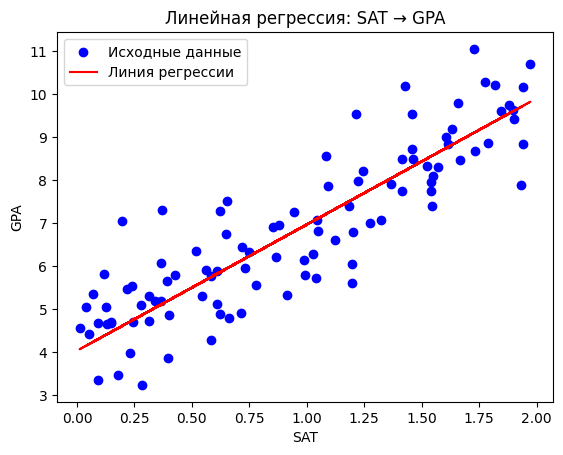

In [107]:
plt.scatter(X, y, label="Исходные данные", color="blue")

# ✅ Нарисуем предсказанную линию регрессии
y_pred = obj1.predict(X)  # Предсказания модели
plt.plot(X, y_pred, label="Линия регрессии", color="red")

# 📌 Подписи осей и заголовок
plt.xlabel("SAT")  # Или другая фича
plt.ylabel("GPA")  # Целевая переменная
plt.title("Линейная регрессия: SAT → GPA")

# 📌 Добавим легенду и покажем график
plt.legend()
plt.show()